In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
np.random.seed(42)

data = {
    'product_id' : range(1, 21),
    'product_name' : [f'Product{i} ' for i in range(1, 21)],
    'category' : np.random.choice(['Electronic', 'Clothing', 'Home', 'Sports'], 20),
    'units_sold' : np.random.poisson(lam=20, size=20),
    'sales_date' : pd.date_range(start = '2023-01-01', periods=20, freq='D')
    }

sales_data = pd.DataFrame(data)

print(sales_data)


    product_id product_name    category  units_sold sales_date
0            1    Product1         Home          25 2023-01-01
1            2    Product2       Sports          15 2023-01-02
2            3    Product3   Electronic          17 2023-01-03
3            4    Product4         Home          19 2023-01-04
4            5    Product5         Home          21 2023-01-05
5            6    Product6       Sports          17 2023-01-06
6            7    Product7   Electronic          19 2023-01-07
7            8    Product8   Electronic          16 2023-01-08
8            9    Product9         Home          21 2023-01-09
9           10   Product10     Clothing          21 2023-01-10
10          11   Product11         Home          17 2023-01-11
11          12   Product12         Home          22 2023-01-12
12          13   Product13         Home          14 2023-01-13
13          14   Product14         Home          17 2023-01-14
14          15   Product15       Sports          17 202

In [3]:
sales_data.to_csv('sales_data.csv', index=False)

import os
os.getcwd()

'c:\\Users\\CHAITANYA\\Documents\\MLmodelsall'

In [4]:
descriptive_stats = sales_data['units_sold'].describe()

print("\nDescriptive Statistic for Units Sold:")
print(descriptive_stats)

mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
varince_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()

print("\n Statistical Analysis:")
print(f"Mean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Variance Units Sold: {varince_sales}")
print(f"Standard Deviation Units Sold: {std_deviation_sales}")
print("\nCategory Statastics")
print(category_stats)


Descriptive Statistic for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

 Statistical Analysis:
Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 17
Variance Units Sold: 10.90526315789474
Standard Deviation Units Sold: 3.3023117899275864

Category Statastics
     category  sum       mean       std
0    Clothing   21  21.000000       NaN
1  Electronic   73  18.250000  2.217356
2        Home  181  20.111111  3.723051
3      Sports  101  16.833333  2.714160


In [5]:
# Inferential Statistics

confidence_level = 0.95

degrees_of_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

# tscore

t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
margin_of_error = t_score * sample_standard_error

confidence_inerval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for Mean of Units Sold")
print(confidence_inerval)


Confidence Interval for Mean of Units Sold
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [6]:
t_statstic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print("\n Hypothesis Testing(t-test):")
print(f"T-statistic: {t_statstic}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean number of units sold is different from 20")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not different from 20")
    
    


 Hypothesis Testing(t-test):
T-statistic: -1.6250928099424466, P-value: 0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not different from 20


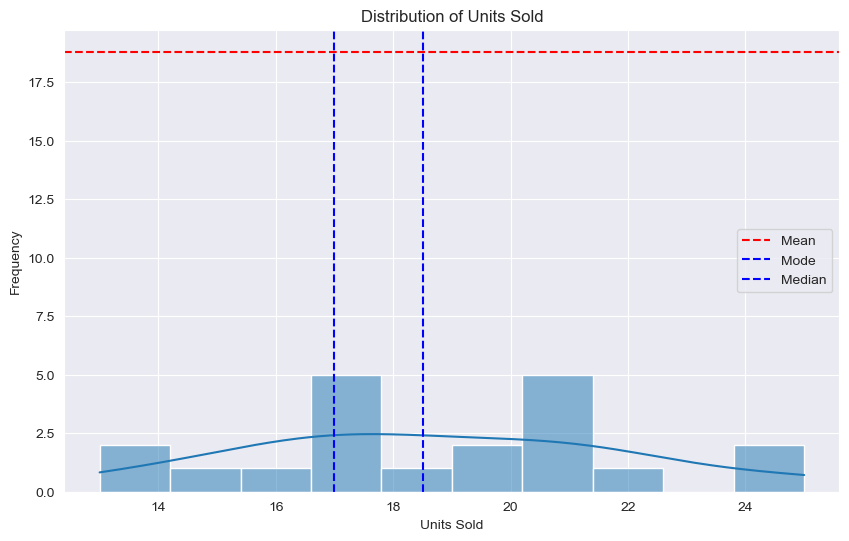

In [7]:
# visualizations

sns.set_style('darkgrid')

# plot distribution of units sold

plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axhline(mean_sales, color='red', label='Mean',linestyle='--')
plt.axvline(mode_sales, color='blue', label='Mode',linestyle='--')
plt.axvline(median_sales, color='blue', label='Median',linestyle='--')
plt.legend()
plt.show()


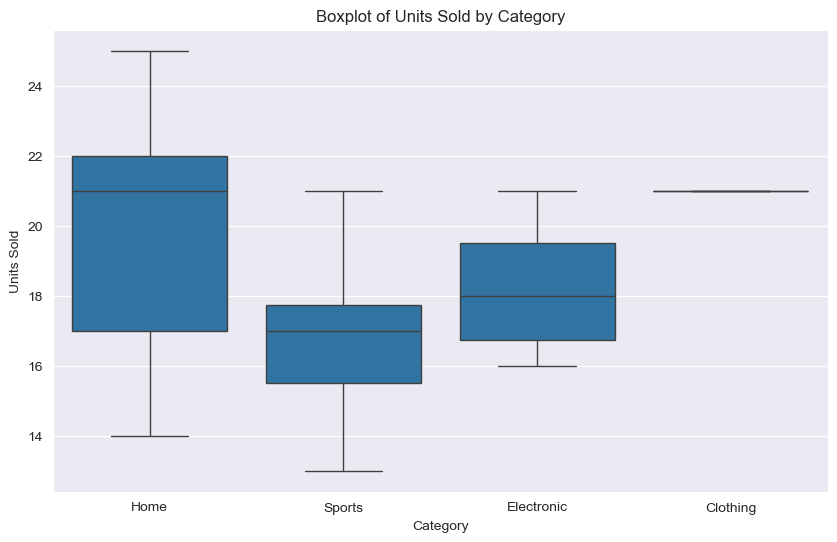

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

In [9]:
print(category_stats.columns)


Index(['category', 'sum', 'mean', 'std'], dtype='object')


In [10]:
category_stats = sales_data.groupby('category')['Units Sold'].sum().reset_index()

# ✅ Step 2: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Units Sold', data=category_stats, palette='viridis')

plt.title('Total Units Sold by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Column not found: Units Sold'